In [19]:
!pip install cartopy
!pip install cfgrib
!pip install metpy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Opdracht satellietdata analyseren
In deze opdracht ga je met échte satellietdata werken om de temperatuurverandering in Bonaire te analyseren. Je gaat met de volgende dataset werken:

Muñoz Sabater, J. (2019): ERA5-Land monthly averaged data from 1950 to present. Copernicus Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.68d2bb30 (Accessed on DD-MMM-YYYY)

---
Als eerst moeten we de nodige Python-libraries importeren.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from metpy.units import units
from metpy.constants import g

Dan openen we de dataset.

In [2]:
ds = xr.open_dataset('data.grib').metpy.parse_cf()
ds

<xarray.Dataset> Size: 2MB
Dimensions:              (time: 901, latitude: 21, longitude: 31)
Coordinates:
    number               int64 8B ...
  * time                 (time) datetime64[ns] 7kB 1950-01-01 ... 2025-01-01
    step                 timedelta64[ns] 8B ...
    depthBelowLandLayer  float64 8B ...
  * latitude             (latitude) float64 168B 13.0 12.9 12.8 ... 11.1 11.0
  * longitude            (longitude) float64 248B -70.0 -69.9 ... -67.1 -67.0
    valid_time           (time) datetime64[ns] 7kB ...
    metpy_crs            object 8B Projection: latitude_longitude
Data variables:
    stl1                 (time, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-18T14:05 GRIB to CDM+CF via cfgrib-0.9.1...

De temperatuur wordt in `Kelvin` gegeven. Wat moeten we doen met de data om dit naar `Celsius` te veranderen?

In [3]:
ds = ds - 273.15

Laten we een kijkje nemen naar de data. Als je de onderstaande code runt, zal je een kaart zien van Carribisch Nederland.

Text(0.5, 1.0, 'Land Surface Temperature Around the Carribean')

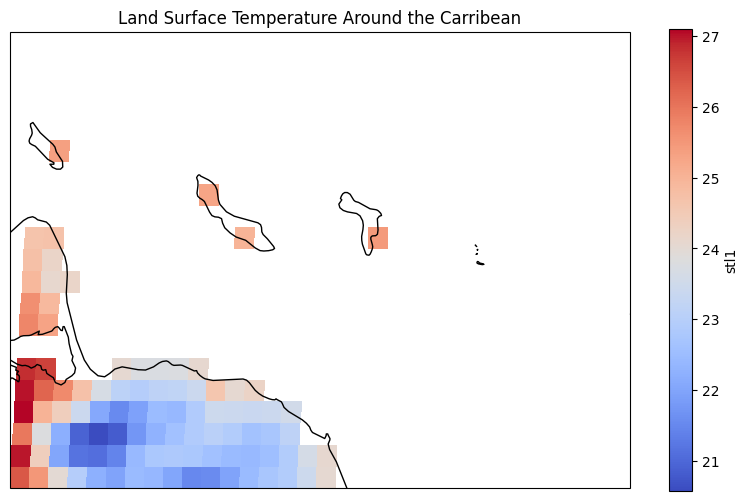

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = ds.stl1[0].plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)

plt.title("Land Surface Temperature Around the Carribean")

Kunnen we aan de hand van de bovenstaande kaart de temperatuurverandering door te tijd heen zien? Waarom wel/niet?

We gaan nu kijken naar Bonaire specifiek om te temperatuurverandering door de tijd heen te zien. Zoek de latitude en longitude op op google maps en vul die hieronder in:

In [5]:
latitude_bonaire =  12.123123679405836
longitude_bonaire =  -68.2814047798956

Met deze data kunnen we nu een grafiek maken van de temperatuuur vanaf 1951 tot en met 2022.

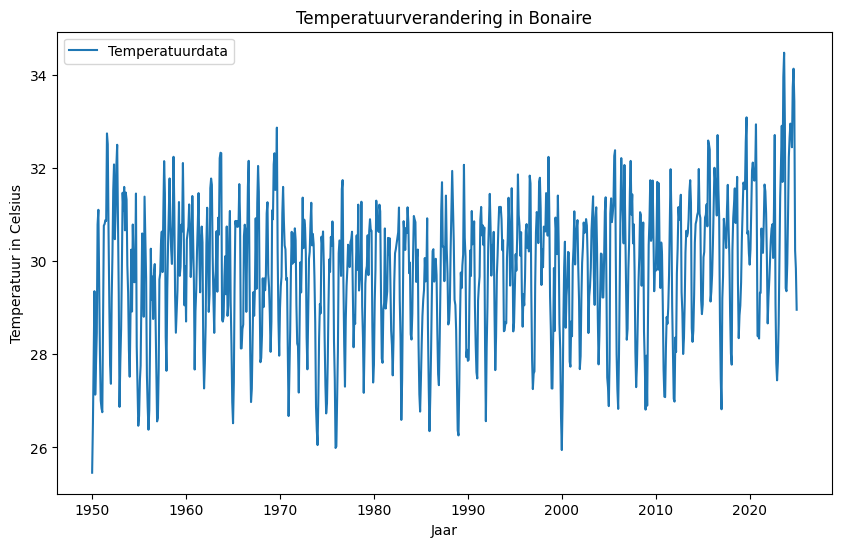

In [6]:
# Step 1: Mask out NaN values
valid_data = ds.stl1.where(ds.stl1.notnull(), drop=True)

# Step 2: Find the nearest valid point
bonaire = valid_data.sel(latitude=latitude_bonaire, longitude=longitude_bonaire, method="nearest")

plt.figure(figsize=(10, 6))
bonaire.plot(label="Temperatuurdata")
plt.xlabel("Jaar")
plt.ylabel("Temperatuur in Celsius")
plt.title("Temperatuurverandering in Bonaire")
plt.legend()
plt.show()

Hier kunnen we al een beetje een stijging zien in de temperatuur, maar we kunnen een trendlijn toevoegen om dit beter te zien.

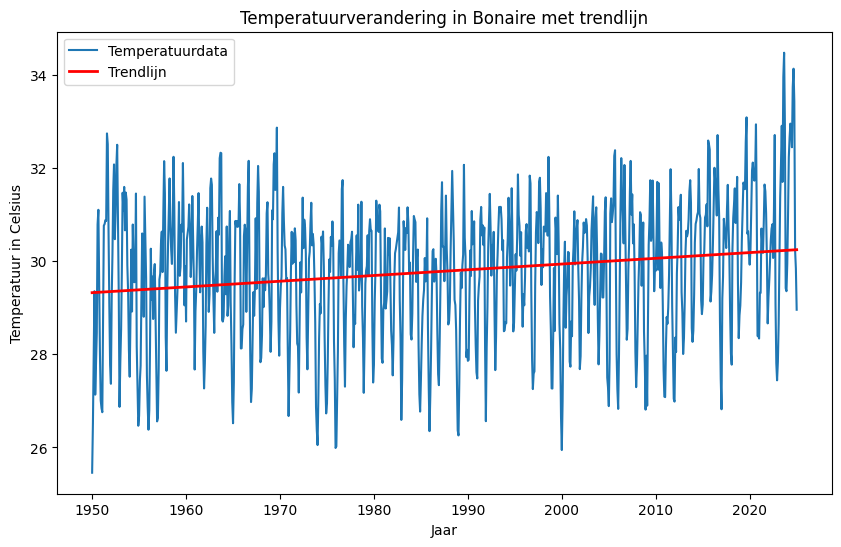

In [7]:
# Convert time to numerical values for regression
time_numeric = (ds.time - ds.time[0]) / np.timedelta64(1, 'D')  # Convert time to days since start

# Calculate the trend line (linear regression)
coefficients = np.polyfit(time_numeric, bonaire, deg=1)  # deg=1 for linear trend
trend_line = np.polyval(coefficients, time_numeric)

# Add the trend line to the dataset
bonaire["trend"] = (("time"), trend_line)

plt.figure(figsize=(10, 6))
bonaire.plot(label="Temperatuurdata")
bonaire.trend.plot(label="Trendlijn", color="red", linewidth=2)
plt.xlabel("Jaar")
plt.ylabel("Temperatuur in Celsius")
plt.title("Temperatuurverandering in Bonaire met trendlijn")
plt.legend()
plt.show()

De trendlijn laat de stijging wat duidelijker zien. Wel zien we dat de lijn heel ver boven de trendlijn gaat, en dan weer heel ver onder. Laten we inzoomen op een jaar om dit beter te zien. Je mag zelf kiezen welk jaar en dan kan je het hieronder invullen. Als je het leuk vind kun je ook meerdere jaartallen uitproberen!

Text(0, 0.5, 'Temperatuur in Celsius')

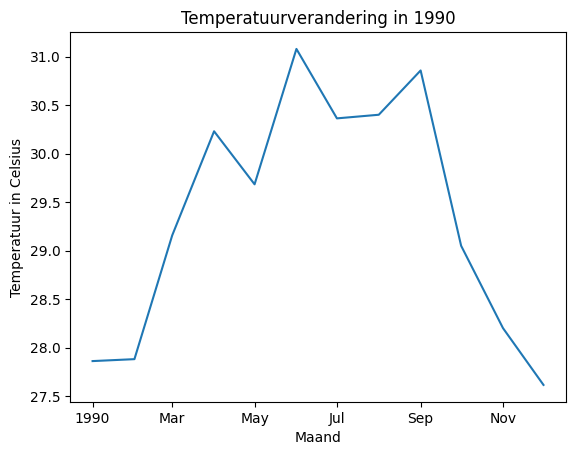

In [9]:
jaar = 1990

# Step 2: Find the nearest valid point
time_sliced = bonaire.sel(time=slice(f"{jaar}-01-01", f"{jaar}-12-31"))

time_sliced.plot()
plt.title(f"Temperatuurverandering in {jaar}")
plt.xlabel("Maand")
plt.ylabel("Temperatuur in Celsius")


Nu dat je hebt ingezoomd op de individuele jaren, verklaar waarom de temperatuur zoveel uitwijkt van de trendlijn